# USED CAR


1. Predicting the duration listed for make/model

2. Predicting which model/make sell faster

3. Predicting price 


manufacturer_name: the name of the car manufacturer

model_name: the name of the car model

transmission: the type of transmission the car has

color: the body color of the car

odometer_value: odometer state in kilometers

year_produced: the year the car was produced

engine_fuel: the fuel type of the engine of the car

engine_has_gas: whether or not the car has a propane tank with tubing

engine_type: the engine type of the car

engine_capacity: capacity of the engine in liters

body_type: the of body the car has

has_warranty: whether the car has warranty

state: the state of the car (new, owned, etc.)

drivetrain: type of drivetrain (front, rear, all)

feature_1 – feature_9: these features are boolean values about properties of the car

duration_listed: the number of days the car is listed in the catalog

price_usd: price of the car in USD



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\user\Downloads\cars.csv')
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
print(data.shape)
print(data.info())

(38531, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_r

In [4]:
#quantitative analysis
data.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


# EDA

In [5]:
data.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

manufacturer_name    0.000000
model_name           0.000000
transmission         0.000000
color                0.000000
odometer_value       0.000000
year_produced        0.000000
engine_fuel          0.000000
engine_has_gas       0.000000
engine_type          0.000000
engine_capacity      0.025953
body_type            0.000000
has_warranty         0.000000
state                0.000000
drivetrain           0.000000
price_usd            0.000000
is_exchangeable      0.000000
location_region      0.000000
number_of_photos     0.000000
up_counter           0.000000
feature_0            0.000000
feature_1            0.000000
feature_2            0.000000
feature_3            0.000000
feature_4            0.000000
feature_5            0.000000
feature_6            0.000000
feature_7            0.000000
feature_8            0.000000
feature_9            0.000000
duration_listed      0.000000
dtype: float64

We have 10 null values on engine capacity , as our data size is 38531 dropping 10 null values will not be affecting our data 

In [7]:
data = data.dropna()
data.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [8]:
data.shape

(38521, 30)

In [9]:
data.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

# Univariate Analysis 

# Analyzing odometer_value

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


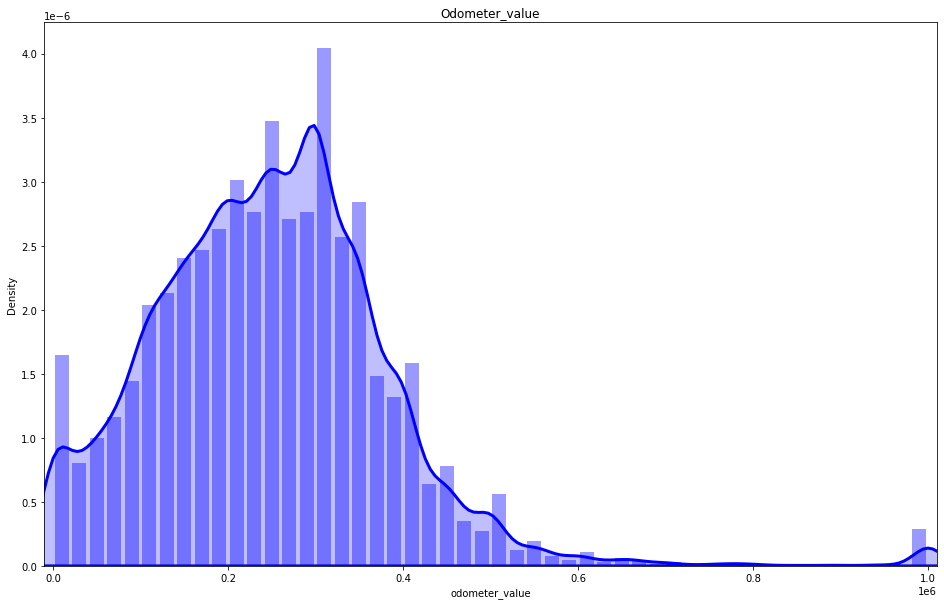

Mean value for odometer_value: 248910.07442693596
Median value for odometer_value: 250000.0
Min value for odometer_value: 0
Max value for odometer_value: 1000000


In [10]:
#odometer value
attribute='odometer_value'
plt.figure(figsize=(16,10))
plt.xlim(data[attribute].min()-10000, data[attribute].max()+10000)
sns.distplot(data.loc[data[attribute]<1200000, attribute],
             hist=True, kde=True, 
             kde_kws={'shade': True, 'linewidth': 3},
             hist_kws={'rwidth':0.8},
             label=attribute,
             color='blue', 
             axlabel=attribute)
plt.title(f"{attribute.capitalize()}")
plt.show()

print(f'Mean value for {attribute}: {data[attribute].mean()}')
print(f'Median value for {attribute}: {data[attribute].median()}')
print(f'Min value for {attribute}: {data[attribute].min()}')
print(f'Max value for {attribute}: {data[attribute].max()}')

# Analyzing year_produced

In [24]:
data['year_produced'].unique()

array([2010, 2002, 2001, 1999, 2011, 1998, 2004, 2003, 2008, 2005, 2014,
       2013, 2006, 2007, 1997, 1994, 1993, 1991, 2016, 2009, 2012, 1995,
       1992, 2000, 1996, 2017, 2015, 1987, 2018, 1990, 2019, 1986, 1977,
       1982, 1981, 1979, 1978, 1984, 1980, 1988, 1985, 1989, 1960, 1975,
       1972, 1976, 1959, 1973, 1983, 1956, 1962, 1963, 1974, 1971, 1968,
       1967, 1966, 1964, 1969, 1965, 1950, 1942, 1961, 1970], dtype=int64)

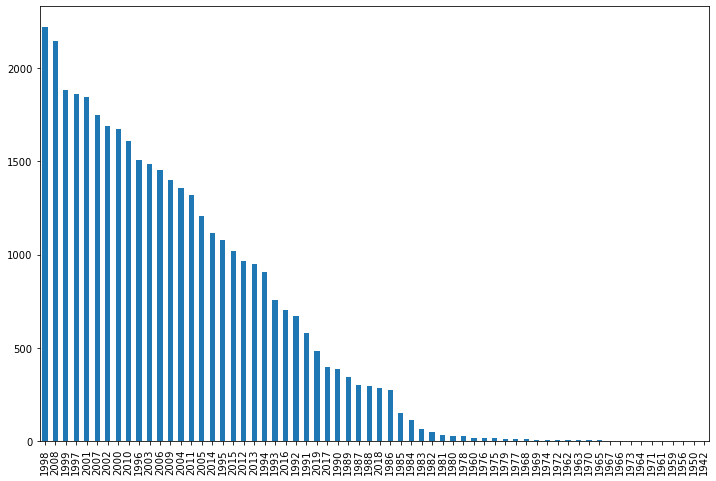

In [25]:
#year_produced
attribute='year_produced'
plt.figure(figsize=(12,8))
pd.value_counts(data[attribute]).plot.bar()
plt.show()

# Analyzing price_usd

price_usd: price of the car in USD

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


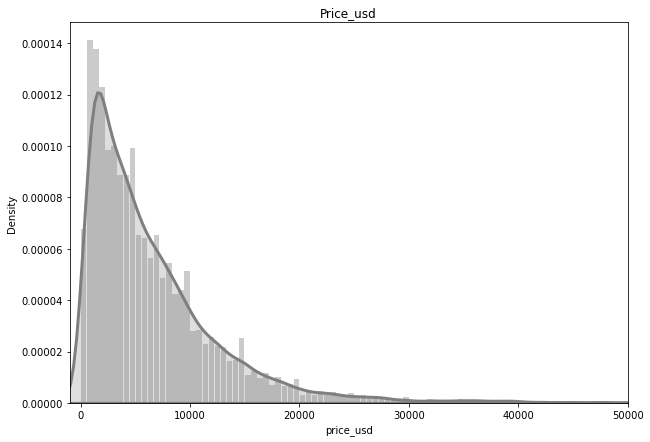

Mean value for price_usd: 6637.160884193028
Median value for price_usd: 4800.0
Min value for price_usd: 1.0
Max value for price_usd: 50000.0


In [29]:
attribute='price_usd'
plt.figure(figsize=(10,7))
plt.xlim(-1000, data[attribute].max())
sns.distplot(data.loc[data[attribute]<200000, attribute],
             hist=True, kde=True, 
             kde_kws={'shade': True, 'linewidth': 3},
             hist_kws={'rwidth':0.9},
             label=attribute,
             color='#7f7f7f', 
             bins=90,
             axlabel=attribute)
plt.title(f"{attribute.capitalize()}")
plt.show()

print(f'Mean value for {attribute}: {data[attribute].mean()}')
print(f'Median value for {attribute}: {data[attribute].median()}')
print(f'Min value for {attribute}: {data[attribute].min()}')
print(f'Max value for {attribute}: {data[attribute].max()}')

# Analyzing drive_train

drivetrain: type of drivetrain (front, rear, all)

In [31]:
data['drivetrain'].unique()

array(['all', 'front', 'rear'], dtype=object)

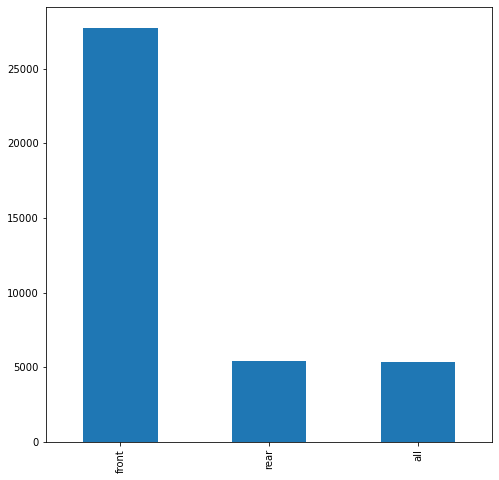

In [30]:
attribute='drivetrain'
plt.figure(figsize=(8,8))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

Inference:

# Analyzing Engine_type

engine_type: the engine type of the car

In [32]:
data['engine_type'].unique()

array(['gasoline', 'diesel'], dtype=object)

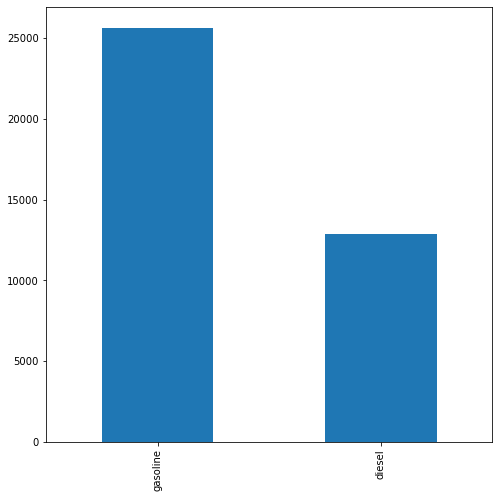

In [33]:
attribute='engine_type'
plt.figure(figsize=(8,8))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

Inference:

# Analyzing engine_capacity

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


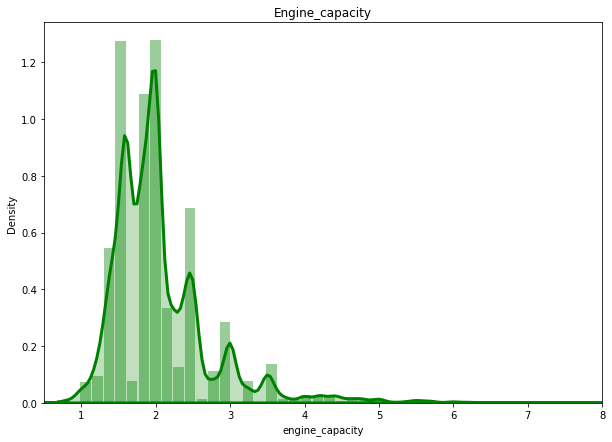

Mean value for engine_capacity: 2.0551611069287987
Median value for engine_capacity: 2.0


In [35]:
attribute='engine_capacity'
plt.figure(figsize=(10,7))
plt.xlim(0.5, 8)
sns.distplot(data.loc[data[attribute]<10, attribute],
             hist=True, kde=True, 
             kde_kws={'shade': True, 'linewidth': 3},
             hist_kws={'rwidth':0.9},
             label=attribute,
             color='green', 
             axlabel=attribute)
plt.title(f"{attribute.capitalize()}")
plt.show()

print(f'Mean value for {attribute}: {data[attribute].mean()}')
print(f'Median value for {attribute}: {data[attribute].median()}')

# Analyzing is_exchangable:

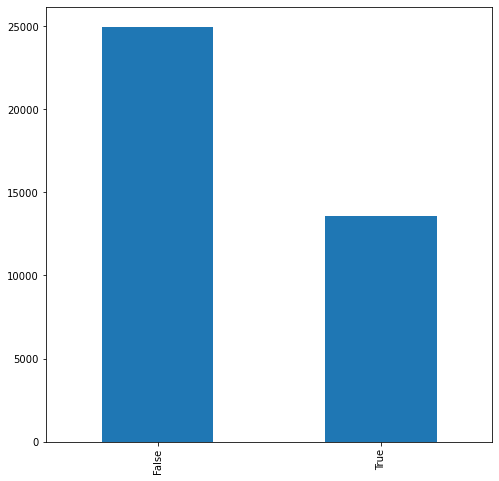

In [37]:
attribute='is_exchangeable'
plt.figure(figsize=(8,8))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

# Analyzing up_counter

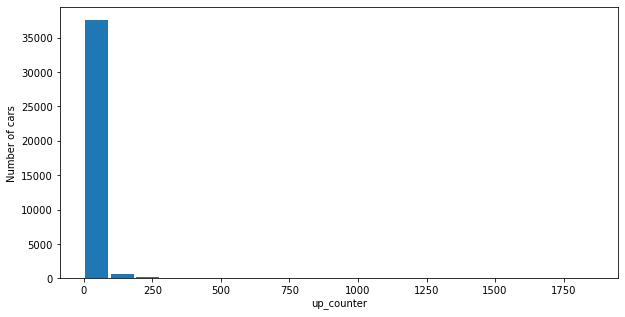

Mean value for up_counter: 16.306586018016148
Median value for up_counter: 5.0


In [38]:
attribute='up_counter'
plt.figure(figsize=(10,5))
hist, bins, _ = plt.hist(data[attribute], bins=20, rwidth=0.9)
plt.ylabel('Number of cars')
plt.xlabel(attribute)
plt.show()

print(f'Mean value for {attribute}: {data[attribute].mean()}')
print(f'Median value for {attribute}: {data[attribute].median()}')

Inference: 

     The distribution is highly uneven , highly skewed. To get a more insight lets try with logarithmetic scale

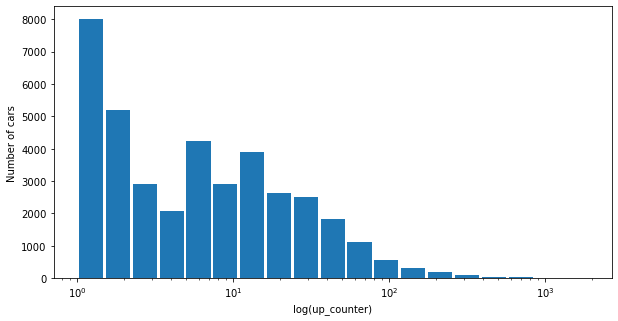

In [39]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),20)
plt.figure(figsize=(10,5))
plt.hist(data[attribute], bins=logbins, rwidth=0.9)
plt.xscale('log')
plt.ylabel('Number of cars')
plt.xlabel('log(up_counter)')
plt.show()

# Analyzing manufacturer_name

In [40]:
attribute = 'manufacturer_name'
data['brand_count'] = data.groupby(attribute)[attribute].transform('count')

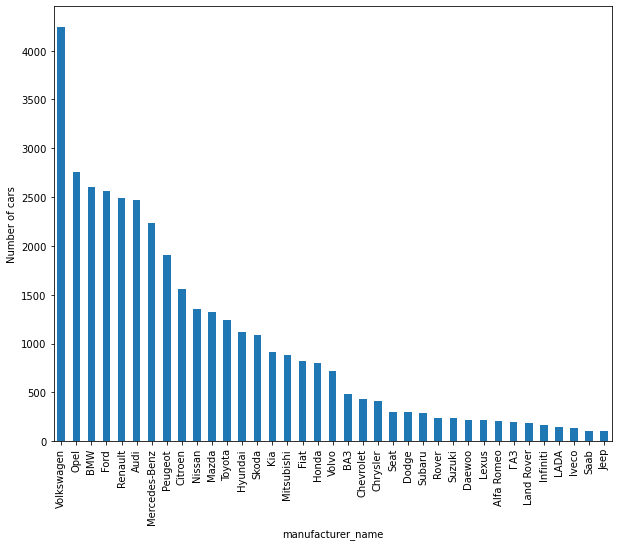

In [51]:
plt.figure(figsize=(10,8))
data.loc[data['brand_count']>100]['manufacturer_name'].value_counts().plot(kind='bar')
plt.ylabel('Number of cars')
plt.xlabel(attribute)
plt.show()

Inference:
    
    Volkswagen is preferred than others

# Analyzing transmission

In [55]:
data['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

<Figure size 360x360 with 0 Axes>

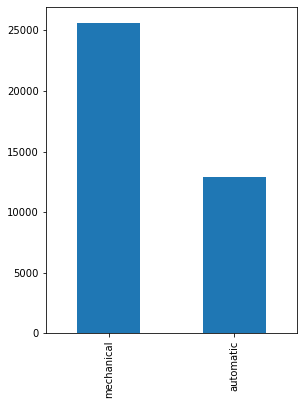

In [54]:
attribute='transmission'

plt.figure(figsize=(5,5))
plt.figure(figsize=(4.5, 6))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

# Analyzing model_name

In [62]:
data['model_name'].value_counts()

Passat    1423
Astra      751
Golf       707
A6         687
Mondeo     637
          ... 
XKR          1
Thema        1
2206         1
SLX          1
C1500        1
Name: model_name, Length: 1116, dtype: int64

Inference: 
    
        Total 1116 model names

# Analyzing color

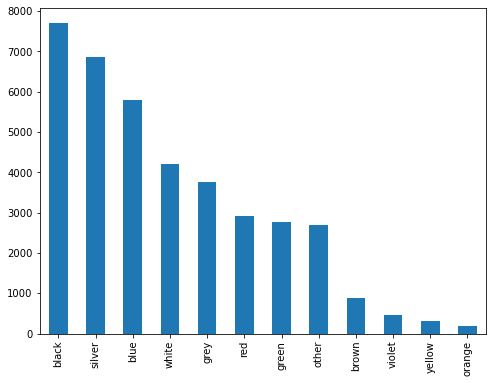

In [63]:
attribute='color'
plt.figure(figsize=(8, 6))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

inference:
    
    Black , silver,blue is most preferred than other colors

# Analyzing engine_fuel

In [64]:
data['engine_fuel'].value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
hybrid-diesel        2
Name: engine_fuel, dtype: int64

inference:
    
     gasoline is preferred than other fuel types

# Analyzing engine_has_gas

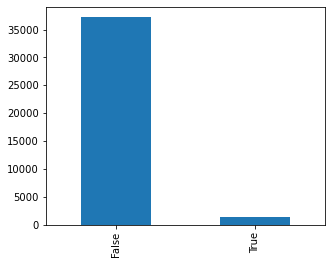

In [65]:
attribute='engine_has_gas'
plt.figure(figsize=(5, 4))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

In [66]:
data[attribute].value_counts()

False    37174
True      1347
Name: engine_has_gas, dtype: int64

Inference:
    
     3.5% of total cars have enabled engine_has_gas

# Analyzing body_type

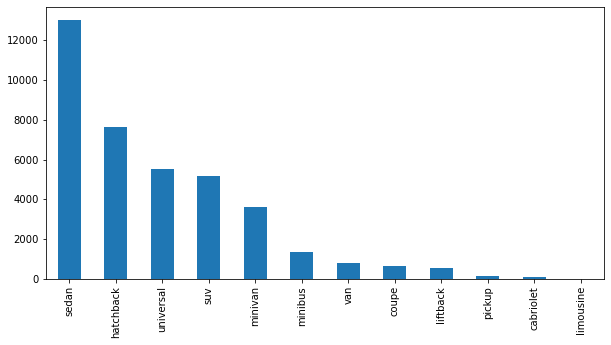

In [69]:
attribute='body_type'
plt.figure(figsize=(10, 5))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

In [70]:
data[attribute].value_counts()

sedan        13011
hatchback     7636
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       550
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64

Inference:
    
    most of the body type belongs to sedan,hatchback,universal,SUV,minivan,minibus

# Analyzing has_warrenty

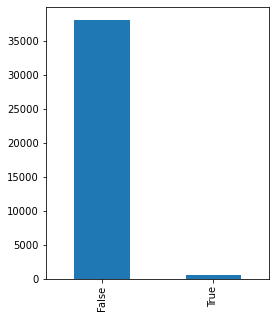

In [73]:
attribute='has_warranty'
plt.figure(figsize=(4, 5))
data[attribute].value_counts()\
                .plot(kind='bar')
plt.show()

# Analyzing state

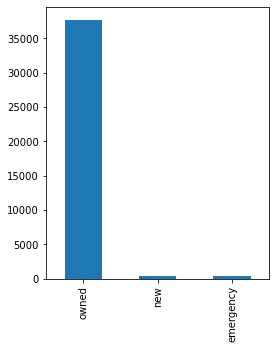

In [74]:
plt.figure(figsize=(4, 5))
data['state'].value_counts()\
                .plot(kind='bar')
plt.show()

In [75]:
data['state'].value_counts()

owned        37713
new            438
emergency      370
Name: state, dtype: int64

# Analyzing region

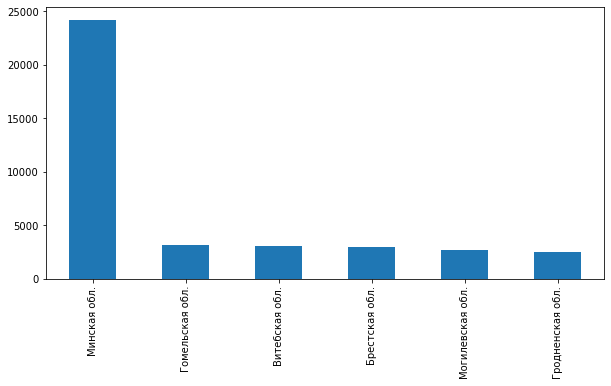

In [78]:
plt.figure(figsize=(10, 5))
data['location_region'].value_counts()\
                .plot(kind='bar')
plt.show()

In [79]:
data['location_region'].value_counts()

Минская обл.        24221
Гомельская обл.      3140
Витебская обл.       3007
Брестская обл.       2990
Могилевская обл.     2678
Гродненская обл.     2485
Name: location_region, dtype: int64

# Analyzing number of photos

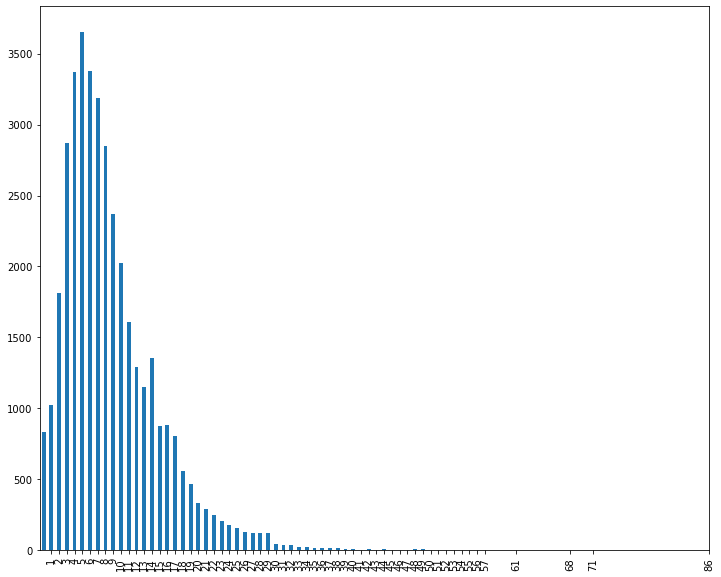

In [81]:
attribute='number_of_photos'
plt.figure(figsize=(12,10))
data[attribute].value_counts().reindex(sorted(data[attribute].unique()))\
                .plot(kind='bar', 
                      xticks=data[attribute].unique())
plt.show()

# Analyzing feature_0 to feature_9

these indicates features present in the car or not like xenon lamps,ac...

In [88]:
data['feature_0'].value_counts()

False    29715
True      8806
Name: feature_0, dtype: int64

In [92]:
data['feature_1'].value_counts()

True     23389
False    15132
Name: feature_1, dtype: int64

In [93]:
data['feature_2'].value_counts()

False    29900
True      8621
Name: feature_2, dtype: int64

In [94]:
data['feature_3'].value_counts()

False    27901
True     10620
Name: feature_3, dtype: int64

In [95]:
data['feature_4'].value_counts()

False    29220
True      9301
Name: feature_4, dtype: int64

In [96]:
data['feature_5'].value_counts()

False    24809
True     13712
Name: feature_5, dtype: int64

In [97]:
data['feature_6'].value_counts()

False    31938
True      6583
Name: feature_6, dtype: int64

In [98]:
data['feature_7'].value_counts()

False    28369
True     10152
Name: feature_7, dtype: int64

In [99]:
data['feature_8'].value_counts()

False    22526
True     15995
Name: feature_8, dtype: int64

In [100]:
data['feature_9'].value_counts()

True     22316
False    16205
Name: feature_9, dtype: int64

# Analyzing duration_listed : Target column

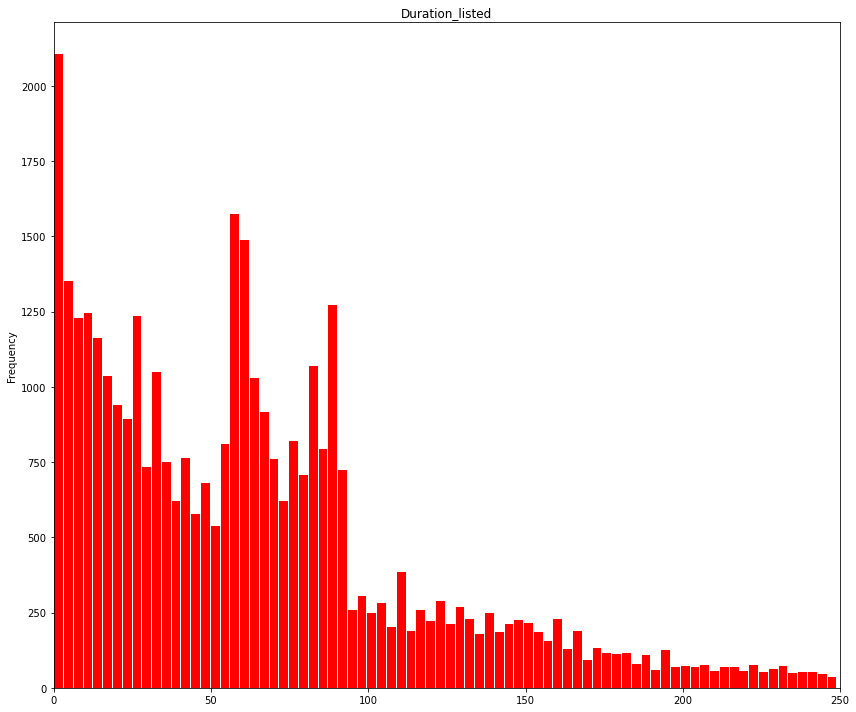

In [102]:
attribute='duration_listed'
plt.figure(figsize=(12,10))
plt.xlim(data[attribute].min(), 250)
data.loc[data[attribute]<250][attribute].plot(kind="hist", rwidth=0.9, 
                 bins=80,
                 color='red')
plt.title(f"{attribute.capitalize()}")
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [11]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
1,290000,2002,3.0,5000.00,12,54,83
2,402000,2001,2.5,2800.00,4,72,151
3,10000,1999,3.0,9999.00,9,42,86
4,280000,2001,2.5,2134.11,14,7,7


In [12]:
#creating correlation matrix for numeric data
cor = data_numeric.corr()
cor

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
odometer_value,1.000000,-0.488448,0.105704,-0.420965,-0.143564,-0.020976,-0.000508
year_produced,-0.488448,1.000000,0.005059,0.705439,0.258064,0.007963,-0.016916
engine_capacity,0.105704,0.005059,1.000000,0.296597,0.106691,0.079152,0.080081
price_usd,-0.420965,0.705439,0.296597,1.000000,0.316879,0.057470,0.033662
number_of_photos,-0.143564,0.258064,0.106691,0.316879,1.000000,0.073880,-0.028181
up_counter,-0.020976,0.007963,0.079152,0.057470,0.073880,1.000000,0.698128
duration_listed,-0.000508,-0.016916,0.080081,0.033662,-0.028181,0.698128,1.000000


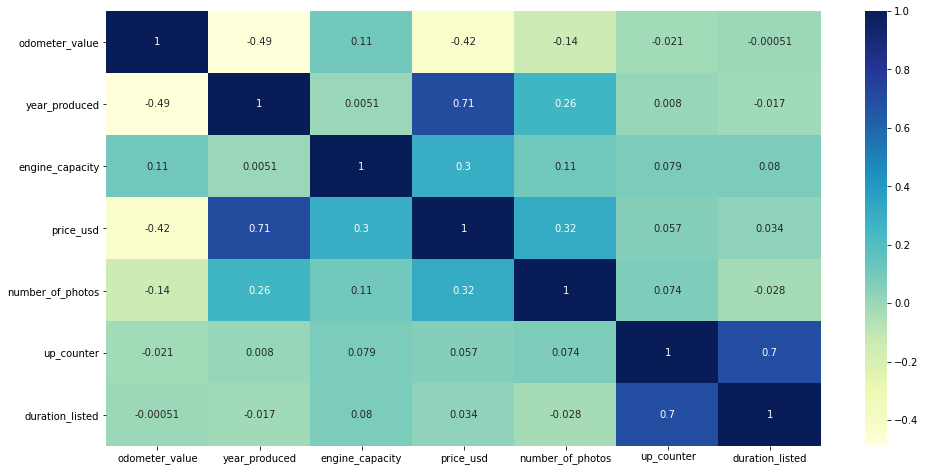

In [13]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Inference:
    
    duration_listed is correlated with up_counter 
    year_produced is highly correlation with price_usd,odometer_value,number_of_photos and engine_capacity

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
#import category_encoders as ce
from sklearn import preprocessing 
from math import sqrt
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Applying label encoding

In [11]:

le = preprocessing.LabelEncoder()

In [12]:
data[['manufacturer_name','model_name', 'transmission','color','location_region','engine_fuel','engine_type','body_type','state','drivetrain']]= data[['manufacturer_name','model_name', 'transmission','color','location_region','engine_fuel','engine_type','body_type','state','drivetrain']].apply(le.fit_transform)

In [13]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,45,763,0,8,190000,2010,2,False,1,2.5,...,True,True,True,False,True,False,True,True,True,16
1,45,763,0,1,290000,2002,2,False,1,3.0,...,True,False,False,True,True,False,False,False,True,83
2,45,519,0,7,402000,2001,2,False,1,2.5,...,True,False,False,False,False,False,False,True,True,151
3,45,609,1,1,10000,1999,2,False,1,3.0,...,False,False,False,False,False,False,False,False,False,86
4,45,664,0,0,280000,2001,2,False,1,2.5,...,True,False,True,True,False,False,False,False,True,7


# changing boolean to integer

In [14]:

data[['engine_has_gas','has_warranty','is_exchangeable','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]=data[['engine_has_gas','has_warranty','is_exchangeable','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']].astype('int')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38521 non-null  int32  
 1   model_name         38521 non-null  int32  
 2   transmission       38521 non-null  int32  
 3   color              38521 non-null  int32  
 4   odometer_value     38521 non-null  int64  
 5   year_produced      38521 non-null  int64  
 6   engine_fuel        38521 non-null  int32  
 7   engine_has_gas     38521 non-null  int32  
 8   engine_type        38521 non-null  int32  
 9   engine_capacity    38521 non-null  float64
 10  body_type          38521 non-null  int32  
 11  has_warranty       38521 non-null  int32  
 12  state              38521 non-null  int32  
 13  drivetrain         38521 non-null  int32  
 14  price_usd          38521 non-null  float64
 15  is_exchangeable    38521 non-null  int32  
 16  location_region    385

In [16]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,45,763,0,8,190000,2010,2,0,1,2.5,...,1,1,1,0,1,0,1,1,1,16
1,45,763,0,1,290000,2002,2,0,1,3.0,...,1,0,0,1,1,0,0,0,1,83
2,45,519,0,7,402000,2001,2,0,1,2.5,...,1,0,0,0,0,0,0,1,1,151
3,45,609,1,1,10000,1999,2,0,1,3.0,...,0,0,0,0,0,0,0,0,0,86
4,45,664,0,0,280000,2001,2,0,1,2.5,...,1,0,1,1,0,0,0,0,1,7


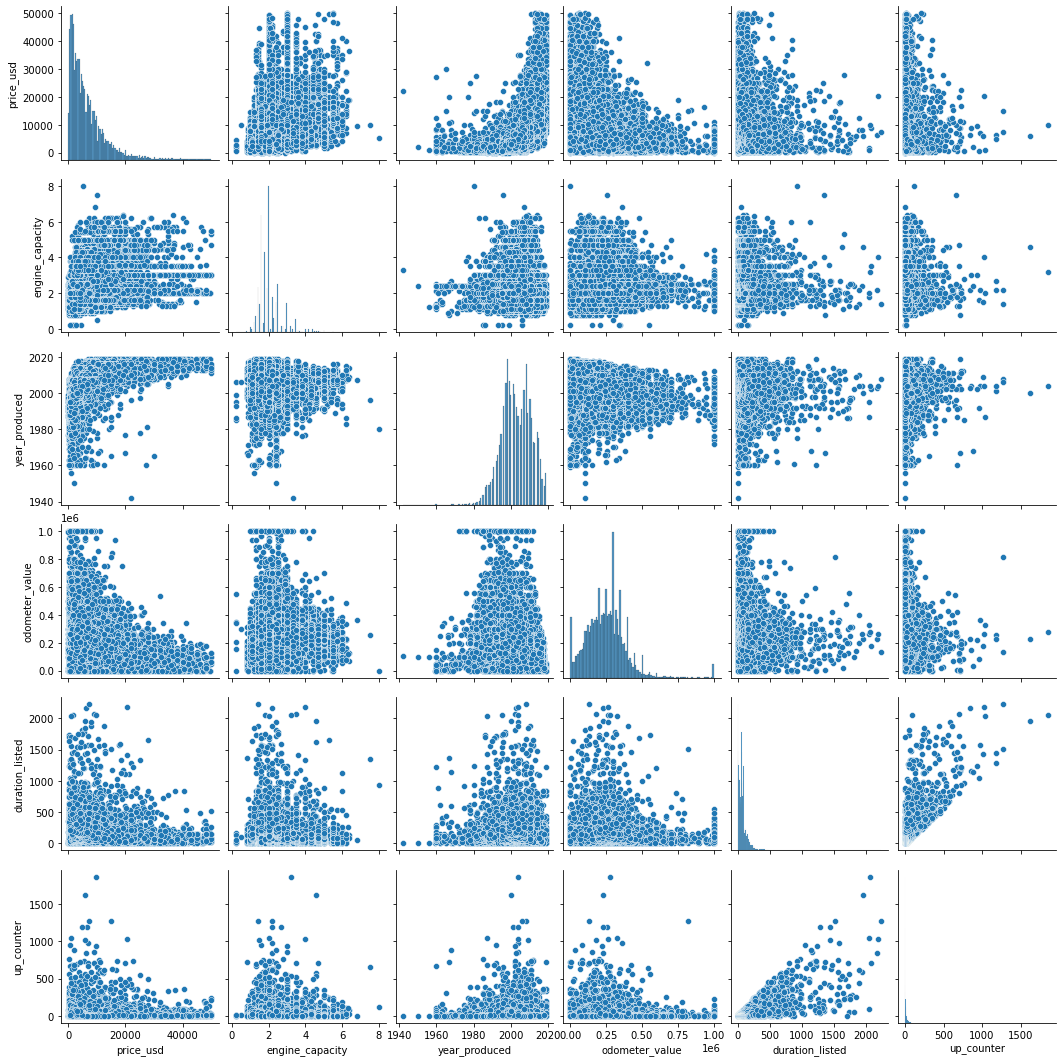

In [17]:
sns.pairplot(data[['price_usd','engine_capacity','year_produced','odometer_value','duration_listed','up_counter']])

# part 1 Predicting Duration listed 

# boxplot to see outliers

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_listed'>

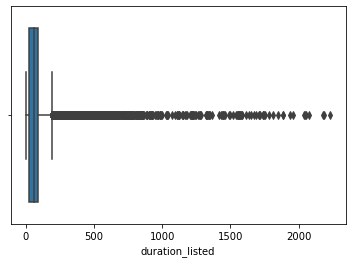

In [25]:
sns.boxplot(data.duration_listed)

In [26]:
data.duration_listed.sort_values(ascending=False).head(10)

16630    2232
22276    2189
5966     2175
4777     2079
34484    2056
11432    2049
34823    2039
24754    1956
33624    1938
35070    1883
Name: duration_listed, dtype: int64

In [27]:
data[data.duration_listed <= 500].count()

manufacturer_name    38109
model_name           38109
transmission         38109
color                38109
odometer_value       38109
year_produced        38109
engine_fuel          38109
engine_has_gas       38109
engine_type          38109
engine_capacity      38109
body_type            38109
has_warranty         38109
state                38109
drivetrain           38109
price_usd            38109
is_exchangeable      38109
location_region      38109
number_of_photos     38109
up_counter           38109
feature_0            38109
feature_1            38109
feature_2            38109
feature_3            38109
feature_4            38109
feature_5            38109
feature_6            38109
feature_7            38109
feature_8            38109
feature_9            38109
duration_listed      38109
dtype: int64

In [28]:
new_data_df=data[data.duration_listed<=500]
new_data_df.shape

(38109, 30)

In [29]:
new_data_df.describe()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
count,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,...,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000
mean,27.683959,567.902175,0.666089,4.486578,249251.358183,2002.953685,1.309481,0.034900,0.666063,2.051869,...,0.606602,0.223071,0.275211,0.240232,0.355428,0.170065,0.263035,0.414075,0.578945,72.318849
std,15.898138,326.479486,0.471614,3.592794,136064.360015,8.040854,0.958189,0.183529,0.471624,0.665920,...,0.488510,0.416311,0.446626,0.427230,0.478649,0.375695,0.440287,0.492568,0.493735,70.364632
min,0.000000,0.000000,0.000000,0.000000,0.000000,1942.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,248.000000,0.000000,1.000000,158500.000000,1998.000000,0.000000,0.000000,0.000000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,31.000000,579.000000,1.000000,4.000000,250000.000000,2003.000000,2.000000,0.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000
75%,39.000000,833.000000,1.000000,8.000000,325000.000000,2009.000000,2.000000,0.000000,1.000000,2.300000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,90.000000
max,54.000000,1115.000000,1.000000,11.000000,1000000.000000,2019.000000,4.000000,1.000000,1.000000,6.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000


Inference:
    
    Data is in different mean and standard deviation and range hence we go for scaling

# Selecting x and Y

In [30]:
y=new_data_df['duration_listed']
X = new_data_df.drop(columns =['duration_listed'])

In [31]:
X.shape

(38109, 29)

In [32]:
y.shape

(38109,)

Scaling data

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [34]:
print(X_scaled)

[[0.83333333 0.68430493 0.         ... 1.         1.         1.        ]
 [0.83333333 0.68430493 0.         ... 0.         0.         1.        ]
 [0.83333333 0.46547085 0.         ... 0.         1.         1.        ]
 ...
 [0.14814815 0.68609865 1.         ... 0.         1.         1.        ]
 [0.14814815 0.07713004 0.         ... 0.         1.         1.        ]
 [0.14814815 0.68609865 1.         ... 0.         0.         1.        ]]


In [35]:
X_scaled.shape

(38109, 29)

In [36]:
y.shape

(38109,)

In [37]:

y = y.values.reshape(-1,1)

In [38]:

scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)

Split data set into test and train

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = .25, random_state = 3)

# Model Building

# 1. Linear Regression model

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:

y_pred_lin = regressor.predict(X_test)

In [36]:

y_train_lin = regressor.predict(X_train)

In [37]:
print("Train Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_lin)))
print("R-squared: ", rs(y_train, y_train_lin))
print("Mean Absolute Error: ", mae(y_train, y_train_lin))

Train Results for Linear regression:
*******************************
Root mean squared error:  0.11384971654370647
R-squared:  0.3502037347892778
Mean Absolute Error:  0.08080876756495943


In [38]:
RMSE_lin = sqrt(mse(y_train, y_train_lin))
R_square_lin = rs(y_train, y_train_lin)
MAE_lin = mae(y_train, y_train_lin)

In [39]:
print("Test Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_lin)))
print("R-squared: ", rs(y_test, y_pred_lin))
print("Mean Absolute Error: ", mae(y_test, y_pred_lin))

Test Results for Linear regression:
*******************************
Root mean squared error:  0.1125136504553771
R-squared:  0.34653920973810837
Mean Absolute Error:  0.08050973080281734


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Ridge Regression model

In [181]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_Ridge = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_Ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [182]:
model_Ridge.best_estimator_

Ridge(alpha=1)

In [183]:
## Predict Train results
y_train_ridge = model_Ridge.predict(X_train)

In [184]:
## Predict Test results
y_pred_ridge = model_Ridge.predict(X_test)

In [185]:
data[['engine_has_gas','has_warranty','is_exchangeable','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]=data[['engine_has_gas','has_warranty','is_exchangeable','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']].astype('int')

Train Results for Ridge regression:
*******************************
Root mean squared error:  0.11385373335299111
R-squared:  0.3501578821724255
Mean Absolute Error:  0.08080419063971817


In [186]:
RMSE_ridge = sqrt(mse(y_train, y_train_ridge))
R_square_ridge = rs(y_train, y_train_ridge)
MAE_ridge = mae(y_train, y_train_ridge)

In [187]:
print("Test Results for Ridge regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_ridge)))
print("R-squared: ", rs(y_test, y_pred_ridge))
print("Mean Absolute Error: ", mae(y_test, y_pred_ridge))

Test Results for Ridge regression:
*******************************
Root mean squared error:  0.11253448348782655
R-squared:  0.3462971976775724
Mean Absolute Error:  0.08051396675641333


# Lasso Regression

In [188]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_LS = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model_LS.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [189]:
model_LS.best_estimator_

Lasso(alpha=0.0001)

In [190]:
## Predict Train results
y_train_LS = model_LS.predict(X_train)

In [191]:
## Predict Test results
y_pred_LS = model_LS.predict(X_test)

In [192]:
print("Train Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_LS)))
print("R-squared: ", rs(y_train, y_train_LS))
print("Mean Absolute Error: ", mae(y_train, y_train_LS))

Train Results for Lasso regression:
*******************************
Root mean squared error:  0.11392349200318147
R-squared:  0.3493613163466812
Mean Absolute Error:  0.08086073113782212


In [193]:
RMSE_ls = sqrt(mse(y_train, y_train_LS))
R_square_ls = rs(y_train, y_train_LS)
MAE_ls = mae(y_train, y_train_LS)

In [194]:
print("Test Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_LS)))
print("R-squared: ", rs(y_test, y_pred_LS))
print("Mean Absolute Error: ", mae(y_test, y_pred_LS))

Test Results for Lasso regression:
*******************************
Root mean squared error:  0.1125926710830057
R-squared:  0.34562100977952825
Mean Absolute Error:  0.08060425532830591


# Support Vector

In [195]:
## Building the model again with the best hyperparameters
model_SVR = SVR(kernel='linear')
model_SVR.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [196]:
## Predict Train results
y_train_SVR = model_SVR.predict(X_train)

In [197]:
## Predict Test results
y_pred_SVR = model_SVR.predict(X_test)

In [198]:
print("Train Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_SVR)))
print("R-squared: ", rs(y_train, y_train_SVR))
print("Mean Absolute Error: ", mae(y_train, y_train_SVR))

Train Results for Support Vector regression:
*******************************
Root mean squared error:  0.11521423717545526
R-squared:  0.3345344143263347
Mean Absolute Error:  0.08368799679517552


In [199]:
RMSE_svr = sqrt(mse(y_train, y_train_SVR))
R_square_svr = rs(y_train, y_train_SVR)
MAE_svr = mae(y_train, y_train_SVR)

In [200]:
print("Test Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_SVR)))
print("R-squared: ", rs(y_test, y_pred_SVR))
print("Mean Absolute Error: ", mae(y_test, y_pred_SVR))

Test Results for Support Vector regression:
*******************************
Root mean squared error:  0.11384852198758996
R-squared:  0.3309418019265138
Mean Absolute Error:  0.08327650983137598


# Decision Tree

In [201]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model_DT = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_DT.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='neg_mean_absolute_error')

In [202]:
model_DT.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=7)

In [203]:
## Predict Train results
y_train_DT = model_DT.predict(X_train)

In [204]:
## Predict Test results
y_pred_DT = model_DT.predict(X_test)

In [205]:
print("Train Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_DT)))
print("R-squared: ", rs(y_train, y_train_DT))
print("Mean Absolute Error: ", mae(y_train, y_train_DT))

Train Results for Decission Tree regression:
*******************************
Root mean squared error:  0.10899262403057958
R-squared:  0.4044646844501729
Mean Absolute Error:  0.07772095805612263


In [206]:
RMSE_dt = sqrt(mse(y_train, y_train_DT))
R_square_dt = rs(y_train, y_train_DT)
MAE_dt = mae(y_train, y_train_DT)

In [207]:
print("Test Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_DT)))
print("R-squared: ", rs(y_test, y_pred_DT))
print("Mean Absolute Error: ", mae(y_test, y_pred_DT))

Test Results for Decission Tree regression:
*******************************
Root mean squared error:  0.11172092181779819
R-squared:  0.3557148467144675
Mean Absolute Error:  0.0793725474654124


# Polynomial regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
polynomial = PolynomialFeatures(degree=2)
polynomial_model = polynomial.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynomial_model,y, train_size=0.7, random_state=42)

# Build second LR model using polynomial features
lr_model_2 = LinearRegression().fit(X_train,y_train)


#PRedict the values
y_train_pred = lr_model_2.predict(X_train)

#Predict test values
y_test_pred = lr_model_2.predict(X_test)

In [53]:
print(lr_model_2.score(X_test, y_test))

0.3660185933773369


# Random Forest

In [45]:
y=new_data_df.pop('duration_listed')
X = new_data_df

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.8min finished


In [48]:
print(gs.best_score_)
print(gs.best_params_)

0.38649371566051755
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


In [49]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)

print('Score: %.2f' % forest.score(X_test, y_test))

Score: 0.39


In [50]:
important_features = pd.Series(data=forest.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

up_counter           0.682266
number_of_photos     0.064861
price_usd            0.034116
feature_1            0.029698
odometer_value       0.029556
model_name           0.025444
year_produced        0.024299
engine_capacity      0.018328
manufacturer_name    0.017475
is_exchangeable      0.011808
color                0.011429
body_type            0.008369
location_region      0.008052
feature_0            0.004566
transmission         0.004536
drivetrain           0.003944
feature_4            0.003055
feature_8            0.002359
engine_fuel          0.002171
feature_3            0.002129
feature_7            0.002044
feature_6            0.001986
feature_2            0.001953
feature_9            0.001875
feature_5            0.001557
engine_type          0.001076
engine_has_gas       0.000712
state                0.000201
has_warranty         0.000136
dtype: float64

# part 2 Predicting Price 

In [17]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,45,763,0,8,190000,2010,2,0,1,2.5,...,1,1,1,0,1,0,1,1,1,16
1,45,763,0,1,290000,2002,2,0,1,3.0,...,1,0,0,1,1,0,0,0,1,83
2,45,519,0,7,402000,2001,2,0,1,2.5,...,1,0,0,0,0,0,0,1,1,151
3,45,609,1,1,10000,1999,2,0,1,3.0,...,0,0,0,0,0,0,0,0,0,86
4,45,664,0,0,280000,2001,2,0,1,2.5,...,1,0,1,1,0,0,0,0,1,7


# boxplot to see the outliers

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_usd'>

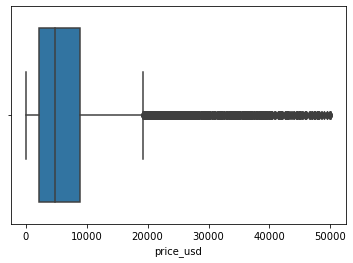

In [18]:
sns.boxplot(data.price_usd)

Inference: Here we have outliers hence fixing a threshold value as 30000 USD

In [19]:
data.price_usd.sort_values(ascending=False).head()

29297    50000.0
7691     50000.0
34421    49999.0
35399    49950.0
31558    49950.0
Name: price_usd, dtype: float64

In [20]:
data[data.price_usd <= 30000].count()

manufacturer_name    38056
model_name           38056
transmission         38056
color                38056
odometer_value       38056
year_produced        38056
engine_fuel          38056
engine_has_gas       38056
engine_type          38056
engine_capacity      38056
body_type            38056
has_warranty         38056
state                38056
drivetrain           38056
price_usd            38056
is_exchangeable      38056
location_region      38056
number_of_photos     38056
up_counter           38056
feature_0            38056
feature_1            38056
feature_2            38056
feature_3            38056
feature_4            38056
feature_5            38056
feature_6            38056
feature_7            38056
feature_8            38056
feature_9            38056
duration_listed      38056
dtype: int64

In [21]:
new_data_df1=data[data.price_usd<= 30000]
new_data_df1.shape

(38056, 30)

In [22]:
y = new_data_df1['price_usd']

In [23]:
X=new_data_df1.drop(columns =['price_usd'])

In [24]:
X.shape

(38056, 29)

In [25]:
y.shape

(38056,)

In [26]:
#data scalar
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [27]:
print(X_scaled)

[[0.83333333 0.68430493 0.         ... 1.         1.         0.00716846]
 [0.83333333 0.68430493 0.         ... 0.         1.         0.03718638]
 [0.83333333 0.46547085 0.         ... 1.         1.         0.06765233]
 ...
 [0.14814815 0.07713004 0.         ... 1.         1.         0.16532258]
 [0.14814815 0.68609865 1.         ... 0.         1.         0.21953405]
 [0.14814815 0.94798206 0.         ... 0.         1.         0.28315412]]


In [28]:
X_scaled.shape

(38056, 29)

In [29]:
y.shape

(38056,)

In [30]:
y = y.values.reshape(-1,1)

In [31]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)

In [32]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = .25, random_state = 3)

# 1. Linear regression model

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred_lin = regressor.predict(X_test)

In [37]:
y_train_lin = regressor.predict(X_train)

In [38]:
print("Train Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_lin)))
print("R-squared: ", rs(y_train, y_train_lin))
print("Mean Absolute Error: ", mae(y_train, y_train_lin))

Train Results for Linear regression:
*******************************
Root mean squared error:  0.09588485985276984
R-squared:  0.719684092805239
Mean Absolute Error:  0.0659202143937803


In [39]:
RMSE_lin = sqrt(mse(y_train, y_train_lin))
R_square_lin = rs(y_train, y_train_lin)
MAE_lin = mae(y_train, y_train_lin)

In [40]:
print("Test Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_lin)))
print("R-squared: ", rs(y_test, y_pred_lin))
print("Mean Absolute Error: ", mae(y_test, y_pred_lin))

Test Results for Linear regression:
*******************************
Root mean squared error:  0.095258125025198
R-squared:  0.7209565462008674
Mean Absolute Error:  0.0661447774893073


# Ridge regression

In [41]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_Ridge = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_Ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [42]:
model_Ridge.best_estimator_

Ridge(alpha=10)

In [43]:
## Predict Train results
y_train_ridge = model_Ridge.predict(X_train)

In [44]:
## Predict Test results
y_pred_ridge = model_Ridge.predict(X_test)

In [45]:
print("Train Results for Ridge regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_ridge)))
print("R-squared: ", rs(y_train, y_train_ridge))
print("Mean Absolute Error: ", mae(y_train, y_train_ridge))

Train Results for Ridge regression:
*******************************
Root mean squared error:  0.09601368662231381
R-squared:  0.7189303460255094
Mean Absolute Error:  0.06585728998471588


In [46]:
RMSE_ridge = sqrt(mse(y_train, y_train_ridge))
R_square_ridge = rs(y_train, y_train_ridge)
MAE_ridge = mae(y_train, y_train_ridge)

In [47]:
print("Test Results for Ridge regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_ridge)))
print("R-squared: ", rs(y_test, y_pred_ridge))
print("Mean Absolute Error: ", mae(y_test, y_pred_ridge))

Test Results for Ridge regression:
*******************************
Root mean squared error:  0.09541370262096453
R-squared:  0.720044322470059
Mean Absolute Error:  0.06616538819231392


# Lasso regression

In [48]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_LS = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model_LS.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [49]:
model_LS.best_estimator_

Lasso(alpha=0.0001)

In [50]:

## Predict Train results
y_train_LS = model_LS.predict(X_train)

In [51]:
## Predict Test results
y_pred_LS = model_LS.predict(X_test)

In [52]:
print("Train Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_LS)))
print("R-squared: ", rs(y_train, y_train_LS))
print("Mean Absolute Error: ", mae(y_train, y_train_LS))

Train Results for Lasso regression:
*******************************
Root mean squared error:  0.09600873463666176
R-squared:  0.7189593380796568
Mean Absolute Error:  0.06581332609383249


In [53]:
RMSE_ls = sqrt(mse(y_train, y_train_LS))
R_square_ls = rs(y_train, y_train_LS)
MAE_ls = mae(y_train, y_train_LS)

In [54]:
print("Test Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_LS)))
print("R-squared: ", rs(y_test, y_pred_LS))
print("Mean Absolute Error: ", mae(y_test, y_pred_LS))

Test Results for Lasso regression:
*******************************
Root mean squared error:  0.09540375277609371
R-squared:  0.7201027075918459
Mean Absolute Error:  0.06610501420446256


# Support vector

In [55]:
## Building the model again with the best hyperparameters
model_SVR = SVR(kernel='linear')
model_SVR.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [56]:
## Predict Train results
y_train_SVR = model_SVR.predict(X_train)

In [57]:
## Predict Test results
y_pred_SVR = model_SVR.predict(X_test)

In [58]:
print("Train Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_SVR)))
print("R-squared: ", rs(y_train, y_train_SVR))
print("Mean Absolute Error: ", mae(y_train, y_train_SVR))

Train Results for Support Vector regression:
*******************************
Root mean squared error:  0.09638757498507912
R-squared:  0.7167370485873201
Mean Absolute Error:  0.06698068312114187


In [59]:
RMSE_svr = sqrt(mse(y_train, y_train_SVR))
R_square_svr = rs(y_train, y_train_SVR)
MAE_svr = mae(y_train, y_train_SVR)

In [60]:
print("Test Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_SVR)))
print("R-squared: ", rs(y_test, y_pred_SVR))
print("Mean Absolute Error: ", mae(y_test, y_pred_SVR))

Test Results for Support Vector regression:
*******************************
Root mean squared error:  0.09582071314575659
R-squared:  0.7176507891713318
Mean Absolute Error:  0.06714965312518088


# Decision tree

In [61]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model_DT = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_DT.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='neg_mean_absolute_error')

In [62]:
model_DT.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6)

In [63]:
## Predict Train results
y_train_DT = model_DT.predict(X_train)

In [64]:
## Predict Test results
y_pred_DT = model_DT.predict(X_test)

In [65]:
print("Train Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_DT)))
print("R-squared: ", rs(y_train, y_train_DT))
print("Mean Absolute Error: ", mae(y_train, y_train_DT))

Train Results for Decission Tree regression:
*******************************
Root mean squared error:  0.07056436375081036
R-squared:  0.8481836562341719
Mean Absolute Error:  0.046617249863103345


In [66]:
RMSE_dt = sqrt(mse(y_train, y_train_DT))
R_square_dt = rs(y_train, y_train_DT)
MAE_dt = mae(y_train, y_train_DT)

In [67]:
print("Test Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_DT)))
print("R-squared: ", rs(y_test, y_pred_DT))
print("Mean Absolute Error: ", mae(y_test, y_pred_DT))

Test Results for Decission Tree regression:
*******************************
Root mean squared error:  0.07425306854066595
R-squared:  0.8304504692261389
Mean Absolute Error:  0.048565997743924436


# Random forest

In [33]:
y=new_data_df1.pop('price_usd')
X = new_data_df1

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.3min finished


In [37]:
print(gs.best_score_)
print(gs.best_params_)

0.8852170855241228
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [40]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
model=forest.fit(X_train, y_train)



print('Score: %.2f' % forest.score(X_test, y_test))

Score: 0.88


In [41]:
#saving file into disk
import pickle
price_pred_model=pickle.dumps(model)

In [43]:
important_features = pd.Series(data=forest.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

year_produced        0.721297
engine_capacity      0.157131
odometer_value       0.025117
model_name           0.018734
manufacturer_name    0.016301
body_type            0.006965
feature_7            0.006524
drivetrain           0.005782
number_of_photos     0.005080
engine_fuel          0.005069
transmission         0.004287
feature_2            0.003765
feature_8            0.003715
duration_listed      0.003708
engine_type          0.003685
up_counter           0.002474
color                0.001808
feature_6            0.001731
feature_9            0.001545
feature_4            0.000907
location_region      0.000860
feature_0            0.000749
feature_3            0.000609
feature_5            0.000597
feature_1            0.000562
state                0.000380
is_exchangeable      0.000315
engine_has_gas       0.000175
has_warranty         0.000128
dtype: float64

In [44]:
y_pred_RF = model.predict(X_test)

In [46]:

print("R-squared: ", rs(y_test, y_pred_RF))


R-squared:  0.8831408668534039
